<a href="https://colab.research.google.com/github/ctclumak/Tensorflow-2-and-Keras-Deep-Learning/blob/master/CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


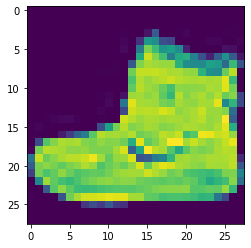

In [3]:
#visualizing the data
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [4]:
#processing the data
X_train.max()

255

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
#Reshape the X arrays to include a 4 dimension of the single channel
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
#convert the y_train and y_test values to be one-hot encoded for categorical analysis
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [0]:
# building the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

In [11]:
model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model
model.fit(X_train,y_cat_train, validation_data=(X_test,y_cat_test),epochs = 3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 36s 602us/sample - loss: 0.4052 - acc: 0.8569 - val_loss: 0.3256 - val_acc: 0.8822
Epoch 2/3
60000/60000 [==============================] - 36s 596us/sample - loss: 0.2762 - acc: 0.8985 - val_loss: 0.2855 - val_acc: 0.8962
Epoch 3/3
60000/60000 [==============================] - 35s 584us/sample - loss: 0.2307 - acc: 0.9147 - val_loss: 0.2731 - val_acc: 0.9025


In [15]:
#Evaluate the model
model.metrics_names

['loss', 'acc']

In [0]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

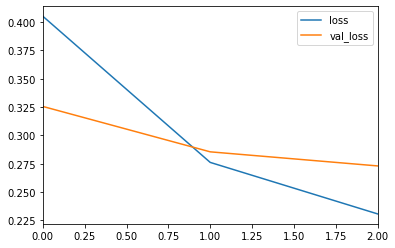

In [20]:
metrics[["loss", "val_loss"]].plot()

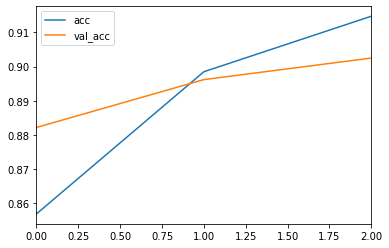

In [21]:
metrics[['acc', 'val_acc']].plot()

In [0]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.87      0.84      1000
           3       0.88      0.94      0.91      1000
           4       0.85      0.84      0.85      1000
           5       0.99      0.94      0.96      1000
           6       0.77      0.69      0.73      1000
           7       0.91      0.98      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

